In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import time
import math

from sklearn.cluster import KMeans
from scipy.special import factorial
from scipy.stats import poisson
from scipy.optimize import minimize

import seaborn as sns
sns.set_style("white")
sns.set_context("talk")

%matplotlib inline

# Learning winnerless compitition network

\begin{equation}
\frac{d a_{i}(t)}{d t}=a_{i}(t)\left[\sigma_{i}(\mathcal{S})-\sum_{j=1}^{N+M} \rho_{i j}(\mathcal{S}) a_{j}(t)\right]+\xi_{i}(t)
\end{equation}

In [149]:
#parameters
Ns = 500
Np = 30
alpha = 1
beta = 2.5
eps = 0.01
sig = 0.0001
tau = 400
V1 = 0.9

#initial connections
V0 = 1.5
V = V0*np.ones((Np,Np))
np.fill_diagonal(V, np.ones(Np))
P = np.ones((Np,Ns)) + np.random.randn(Np,Ns)*0.001


#time
dt = .1
T = 1000
time = np.arange(0,T,dt)

a = np.zeros((Np, len(time)))
a[np.random.choice(Np,5)] = 1

In [150]:
#try diffeent V matrix
V = np.tril(np.random.rand(Np,Np)*0.1, k=-1) + np.tril(np.random.rand(Np,Np)+1, k=1)
np.fill_diagonal(V, np.ones(Np))

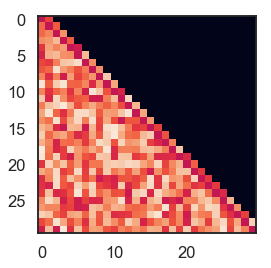

In [151]:
plt.imshow(V)

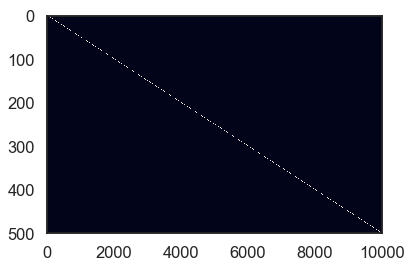

In [152]:
#stimuli
#(tiling time)
dur = int(T/dt/Ns)
x = np.zeros((Ns,len(time)))
tt = 0
for i in range(0,Ns):
    x[i,tt:tt+dur] = 1
    tt = tt+dur
    
plt.imshow(x,aspect='auto')

In [153]:
### Neural Dynamics
for tt in range(0,len(time)-1):
    #activity
    inp = np.matmul(P,x[:,tt])
    a[:,tt+1] = a[:,tt] + dt*(a[:,tt] - a[:,tt]*np.matmul(V,a[:,tt]) + alpha*inp) + np.sqrt(dt)*np.random.rand(Np)*sig
    #projection matrix slow dynamics
    P = P + dt* (eps*a[:,0][:,None]*(beta*x[:,0][None,:]-P))
    #compitition matrix plasticity
    if tt>tau:
        V = V + dt* (eps*np.outer(a[:,tt],a[:,tt-tau])*(V1-V))

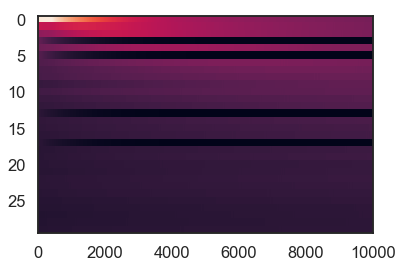

In [154]:
plt.imshow(a,aspect='auto',interpolation='None')

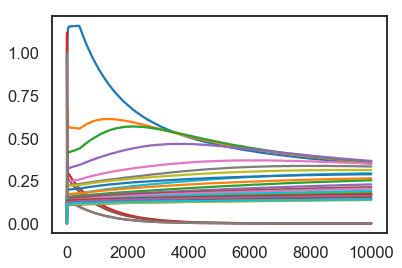

In [155]:
plt.plot(a.T)

# Built in Heteroclinic dynamics

\begin{equation}
\begin{array}{l}{\rho_{i_{k-1} i_{k}}=\frac{\sigma_{i_{k-1}}}{\sigma_{i_{k}}}+0.5} \\ {\rho_{i_{k+1} i_{k}}=\frac{\sigma_{i_{k+1}}}{\sigma_{i_{k}}}-0.5} \\ {\rho_{i i_{k}}=\rho_{i_{k-1} i_{k}}+\frac{\sigma_{i}-\sigma_{i_{k-1}}}{\sigma_{i_{k}}}+2}\end{array}
\end{equation}

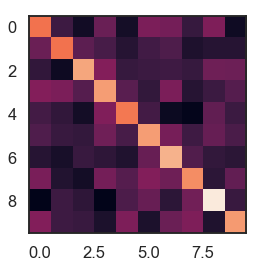

In [88]:
sig_ik = np.random.rand(Np,Np)*0.5 + np.diag(np.ones(Np))
phis = np.zeros((Np,Np,k))